In [51]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [52]:
df = pd.read_csv('/content/processed-data.csv')
df.head(10)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
5,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
7,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
8,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1


In [53]:
#Get the shape to know number of rows and columns
df.shape

(316800, 19)

In [54]:
#Check for null values
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64

In [55]:
df['Severity_Moderate'].value_counts()

0    237600
1     79200
Name: Severity_Moderate, dtype: int64

In [56]:
#Since we predicting the severity, we can merge mild, moderate and none

df = df.replace({'Severity_Mild': {1: 2}})

In [57]:

df = df.replace({'Severity_Moderate': {1: 3}})

In [58]:


df = df.replace({'Severity_None': {1: 1}})

In [59]:
df.sample(20)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
35572,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,3,0
302413,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,2,0,0
219085,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,2,0,0
152317,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,2,0,0
195283,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
213468,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,2,0,0
30805,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,2,0,0
246426,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
239294,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0
314139,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3,0


In [60]:
df['Severity'] = df['Severity_Mild'] + df['Severity_None'] + df['Severity_Moderate']

In [61]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Severity
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,2,0,0,2
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,2,0,0,2
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,2,0,0,2
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,3,0,3
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [62]:
#droping the columns as we have got our target variable
df = df.drop(['Severity_Mild', 'Severity_None', 'Severity_Moderate'], axis = 1)

In [63]:
df['Severity'].value_counts()

2    79200
3    79200
0    79200
1    79200
Name: Severity, dtype: int64

##sketching the heatmap##

In [64]:
import matplotlib.pyplot as plt

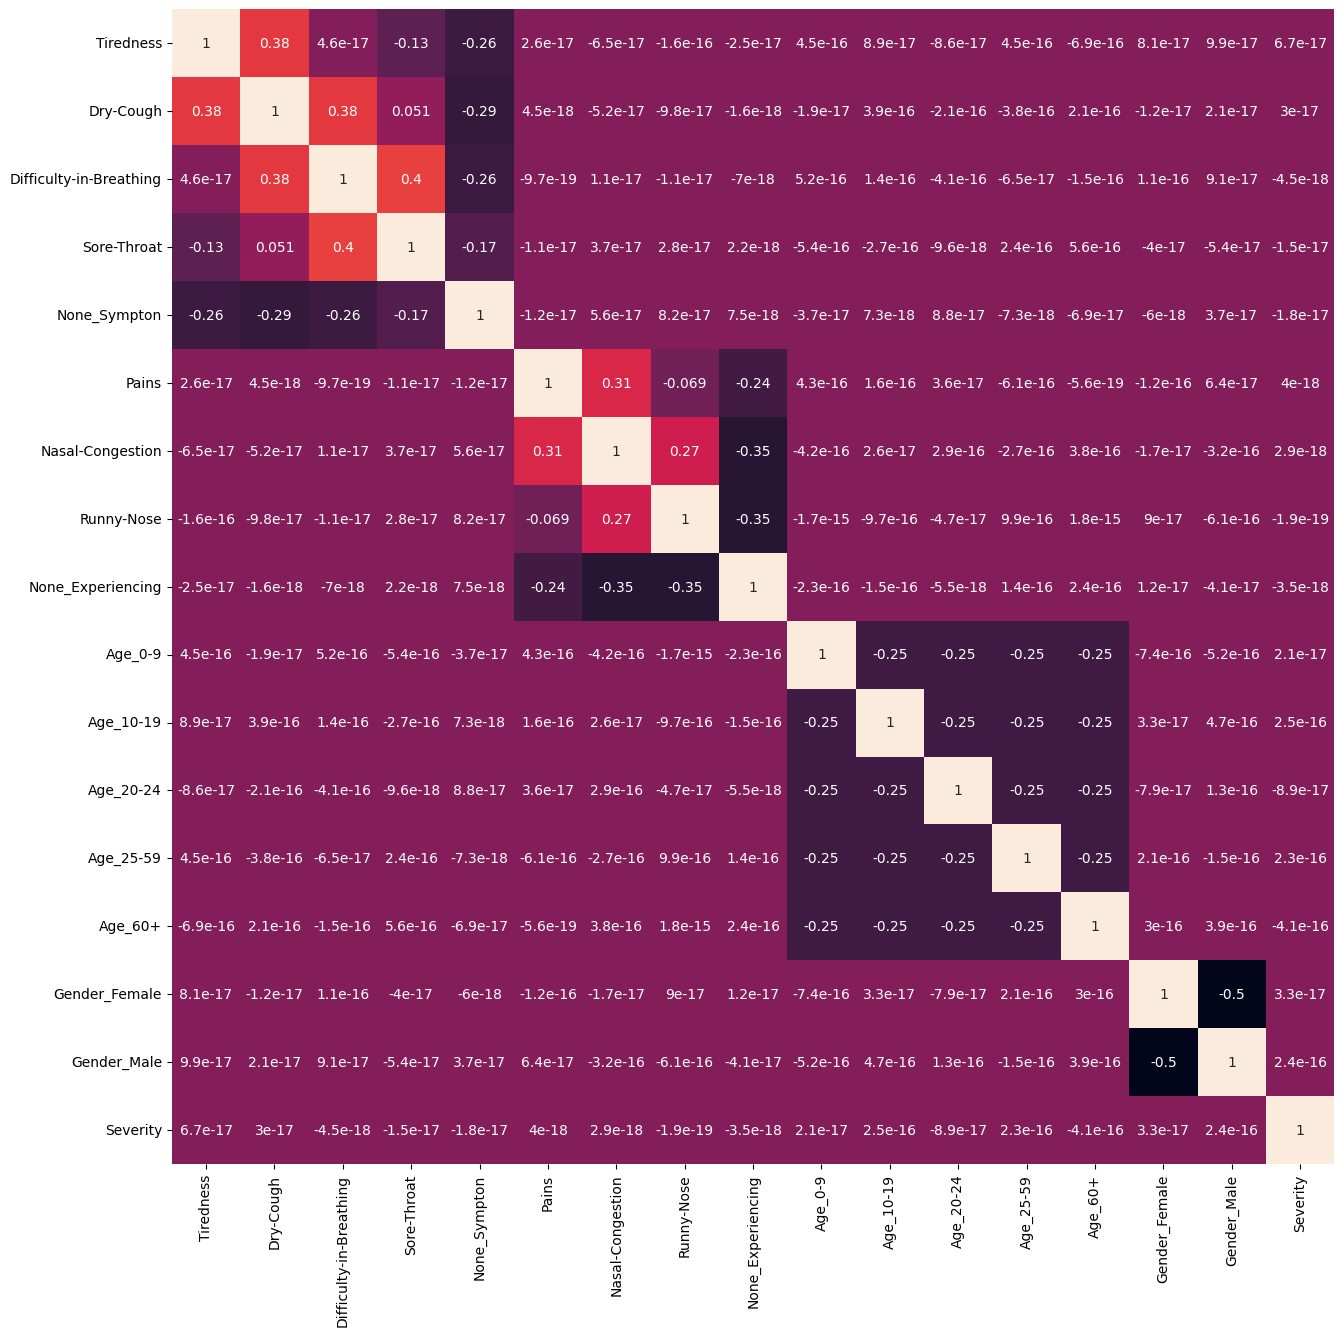

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

In [66]:
df.corr()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity
Tiredness,1.000000e+00,3.779645e-01,4.629153e-17,-1.348400e-01,-2.581989e-01,2.612420e-17,-6.526807e-17,-1.561936e-16,-2.497080e-17,4.505202e-16,8.882113e-17,-8.576039e-17,4.494736e-16,-6.949399e-16,8.081032e-17,9.912807e-17,6.650057e-17
Dry-Cough,3.779645e-01,1.000000e+00,3.779645e-01,5.096472e-02,-2.927700e-01,4.519459e-18,-5.180861e-17,-9.767619e-17,-1.629225e-18,-1.896458e-17,3.856237e-16,-2.104144e-16,-3.836201e-16,2.113728e-16,-1.167547e-17,2.092473e-17,3.004518e-17
Difficulty-in-Breathing,4.629153e-17,3.779645e-01,1.000000e+00,4.045199e-01,-2.581989e-01,-9.663757e-19,1.076763e-17,-1.091121e-17,-7.031419e-18,5.170407e-16,1.351575e-16,-4.082214e-16,-6.537695e-17,-1.540846e-16,1.121118e-16,9.093935e-17,-4.481726e-18
Sore-Throat,-1.348400e-01,5.096472e-02,4.045199e-01,1.000000e+00,-1.740777e-01,-1.063529e-17,3.705775e-17,2.844633e-17,2.188163e-18,-5.386233e-16,-2.669911e-16,-9.614176e-18,2.421704e-16,5.616280e-16,-3.973996e-17,-5.405934e-17,-1.489276e-17
None_Sympton,-2.581989e-01,-2.927700e-01,-2.581989e-01,-1.740777e-01,1.000000e+00,-1.214988e-17,5.584296e-17,8.167388e-17,7.508786e-18,-3.727463e-17,7.307616e-18,8.789589e-17,-7.340191e-18,-6.896450e-17,-6.010305e-18,3.685726e-17,-1.819563e-17
Pains,2.612420e-17,4.519459e-18,-9.663757e-19,-1.063529e-17,-1.214988e-17,1.000000e+00,3.105295e-01,-6.900656e-02,-2.390457e-01,4.312160e-16,1.639895e-16,3.621518e-17,-6.083645e-16,-5.582249e-19,-1.216691e-16,6.398151e-17,3.996287e-18
Nasal-Congestion,-6.526807e-17,-5.180861e-17,1.076763e-17,3.705775e-17,5.584296e-17,3.105295e-01,1.000000e+00,2.666667e-01,-3.464102e-01,-4.171571e-16,2.592296e-17,2.897753e-16,-2.676030e-16,3.820040e-16,-1.749997e-17,-3.172513e-16,2.872451e-18
Runny-Nose,-1.561936e-16,-9.767619e-17,-1.091121e-17,2.844633e-17,8.167388e-17,-6.900656e-02,2.666667e-01,1.000000e+00,-3.464102e-01,-1.748218e-15,-9.737599e-16,-4.729600e-17,9.949420e-16,1.777318e-15,8.987187e-17,-6.066829e-16,-1.850757e-19
None_Experiencing,-2.497080e-17,-1.629225e-18,-7.031419e-18,2.188163e-18,7.508786e-18,-2.390457e-01,-3.464102e-01,-3.464102e-01,1.000000e+00,-2.270842e-16,-1.545795e-16,-5.491011e-18,1.395008e-16,2.422231e-16,1.162783e-17,-4.120360e-17,-3.522895e-18
Age_0-9,4.505202e-16,-1.896458e-17,5.170407e-16,-5.386233e-16,-3.727463e-17,4.312160e-16,-4.171571e-16,-1.748218e-15,-2.270842e-16,1.000000e+00,-2.500000e-01,-2.500000e-01,-2.500000e-01,-2.500000e-01,-7.428272e-16,-5.248003e-16,2.094746e-17


In [67]:
#train-test split of the data
X = df.drop('Severity', axis = 1)
X
y = df['Severity']
y

0         2
1         2
2         2
3         3
4         3
         ..
316795    0
316796    0
316797    1
316798    1
316799    1
Name: Severity, Length: 316800, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)
X_train

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male
100727,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0
107410,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
100760,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
28734,0,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0
162610,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289468,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0
193652,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0
165526,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1
104517,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [69]:
X_train.shape

(253440, 16)

**LOGISTIC REGRESSION**

In [70]:
logReg = LogisticRegression()

In [71]:
#training of the model
logReg.fit(X_train, y_train)

LogisticRegression()

In [72]:
#evaluation of our model
logReg.score(X_test, y_test)

0.24375

In [73]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [74]:
y_hat = logReg.predict(X_test)

In [75]:
accuracy_logreg=accuracy_score(y_test, y_hat)

In [76]:
print(accuracy_logreg)

0.24375


**RANDOM FOREST CLASSIFIER**

In [77]:
rfc = RandomForestClassifier()

In [78]:
# training of our model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
# evaluation of our model
rfc.score(X_train, y_train)

0.2657236426767677

In [80]:
y_hat = rfc.predict(X_test)

In [81]:
accuracy_rfc=accuracy_score(y_test, y_hat)

In [82]:
print(accuracy_rfc)

0.18710542929292928


**NAIVE BAYES THEOREM**

In [83]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)


MultinomialNB()

In [84]:
score_nb=naive_bayes.score(X_train, y_train)

In [85]:
y_hat = naive_bayes.predict(X_test)

In [86]:
accuracy_NB=accuracy_score(y_test, y_hat)

In [87]:
print(accuracy_NB)

0.24393939393939393


In [88]:
# make dictionary of this accuracy score and using matplotlib show the bar graph

**DECISION TREE CLASSIFIER**

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [91]:
score_dt = decision_tree.score(X_train, y_train)

In [92]:
y_pred_dt = decision_tree.predict(X_test)

In [93]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [94]:
print(accuracy_dt)

0.1855429292929293


**XGBOOST**

In [95]:
from xgboost import XGBClassifier

In [96]:
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [97]:
score_xgboost = xgboost_classifier.score(X_train, y_train)

In [98]:
y_pred_xgboost = xgboost_classifier.predict(X_test)

In [99]:
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)

In [100]:
print(accuracy_xgboost)

0.19638573232323234


**THE RESULT**

In [101]:
import matplotlib.pyplot as plt

In [102]:
# Create classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier(),
    'Random Forest Classifier':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression()
}

In [103]:
results = {'Model': [], 'Accuracy': []}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results['Model'].append(name)
    results['Accuracy'].append(score)

In [104]:
acc_df = pd.DataFrame(results)

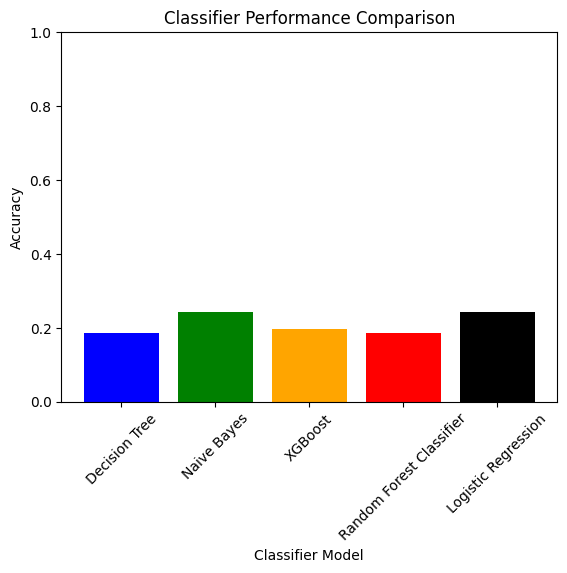

In [107]:
# Plotting
plt.bar(acc_df['Model'], acc_df['Accuracy'], color=['blue', 'green', 'orange', 'red','black'])
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy
plt.title('Classifier Performance Comparison')
plt.xlabel('Classifier Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
